In [1]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#regression librarry
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures

#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os, sys
import csv

In [2]:
# load dataset

train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 9732 rows and 2 Columns


In [3]:
# here we taking only 2 columns level and salary

x_train = train_dataset.iloc[:,:-1].values
y_train = train_dataset.iloc[:,1].values 

In [4]:
# fitting simple linear regression model to the training dataset

lin_reg = LinearRegression(normalize=True)  
lin_reg.fit( x_train, y_train)  

# fitting polynomial regression model to the training dataset

poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)

# fit into multiple Linear regression model

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
# load dataset

CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 2433 rows and 2 Columns


In [ ]:
# split data in label and feature

x_cv = CV_dataset.iloc[:,:-1].values
y_cv = CV_dataset.iloc[:,1].values 


 Accuracy train by acc_r2 84.32714422490636

 Accuracy train by median_ab_error 99.63134498095089


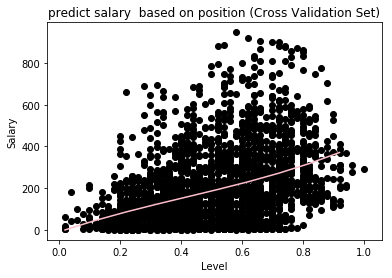

In [7]:
class Cross_validation():
           
    def y_prediction(self,x_cv,lin_reg2,poly_reg):
       
        y_pred_train = lin_reg2.predict(poly_reg.fit_transform(x_cv))
        return y_pred_train
        

    
    def accuracy(self,y_predict_train,y_cv):
        
        # acc using r2
        
        error = r2_score(y_cv, y_predict_train)
        acc_r2 = (1-error)*100
        
        # using median_ab_error
        
        median_ab_error = median_absolute_error(y_cv, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_cv,y_cv,poly_reg, lin_reg2):
        # visualizing the testing set result
        x_grid=np.arange(min(x_cv),max(x_cv),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_cv,y_cv,color='black')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='pink')
        plt.title('predict salary  based on position (Cross Validation Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        

def main():
    
    obj  = Cross_validation()
    
    file1 = open('Polynomial_RegModule.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(x_cv,lin_reg2,poly_reg)
    
    
    acc_r2, median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv,y_cv,poly_reg, lin_reg2)

if __name__ == '__main__':
    main()
